## Differential Event Rate in terms of the momentum transfer in each event

Momentum accommodation coefficient alpha?

https://arxiv.org/abs/2303.09922


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.stats import expon

### Sensor Parameters

In [3]:
density = 1850 # kg/m^3
diameter = 3e-6 # m
volume = (4/3) * np.pi * (diameter/2)**3
sensor_mass = density * volume # in kg
sensor_surface_area = 4 * np.pi * (diameter/2)**2
k_B = 1.38e-23 # J / K
T = 293 # K

print("Sensor Mass =", sensor_mass, "kg")

Sensor Mass = 2.6153758841135025e-14 kg


### Functions

In [4]:
def boltzmann_dist(v, mass_gas):
    return 4*np.pi*v**2 * (mass_gas/(2*np.pi*k_B*T))**(3/2) * np.exp(-mass_gas*v**2/(2*k_B*T))

def z(x):
    return np.pi * x * (1 - 2/(x**2)) *erf(x/2)*np.exp(-x**2/8) + 2*np.exp(-3*x**2/8)

def event_rate(p, mass_gas, v_rms, n_gas, alpha):
    v = p / (2 * mass_gas)
    x = p / (mass_gas * v_rms)
    return n_gas * sensor_surface_area * p * boltzmann_dist(v, mass_gas) * ((1-alpha) + alpha * z(x)) / (4 * mass_gas**2)

def event_rate_approx(p):
    return z * ((1-alpha) + alpha * z)

In [5]:
def momentum_spectrum(mass_u, P):

    mass_gas = mass_u * 1.661e-27 # kg
    e = 1.6022e-19
    c = 2.9979e8 # m / s
    p = np.sqrt(mass_gas * T * k_B) # kg m / s
    p_kev = p / e * c / 1000 # keV / c
    #print("p =", round(p, 23), "kg*m/s =", round(p_kev, 1), "keV/c")

    n_gas = P / (k_B * T)
    v_rms = np.sqrt(k_B * T / mass_gas)
    alpha = 0.2

    # Plot

    # Correct Joule Units
    p = np.linspace(1, 600, 1000) * 1000 * e / c
    rate = event_rate(p, mass_gas, v_rms, n_gas, alpha)

    # Convert to KeV Units
    p = p * c / (1000 * e)
    rate = rate * 1000 * e / c

    max_p = p[np.argmax(rate)]

    return p, rate, max_p


## Gas Collision Momentum Transfer Spectrum

xenon peak Event Rate = 179.08 Hz/keV
krypton peak Event Rate = 143.11 Hz/keV
radon peak Event Rate = 233.05 Hz/keV
sf6 peak Event Rate = 189.27 Hz/keV


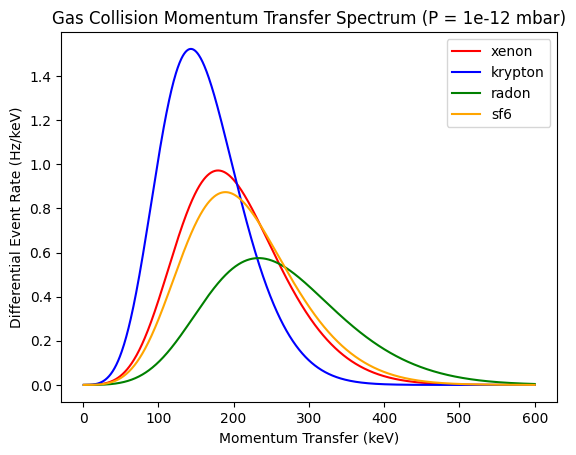

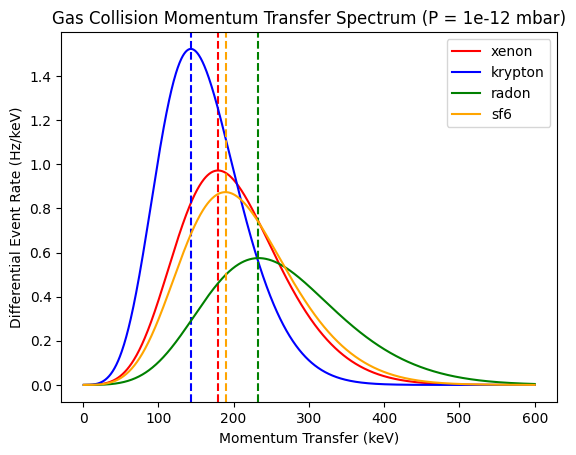

In [21]:
P = 1e-10

xenon = momentum_spectrum(131.3, P)
krypton = momentum_spectrum(83.8, P)
radon = momentum_spectrum(222.017, P)
sf6 = momentum_spectrum(146.05, P)
h2 = momentum_spectrum(2.016, P)
n2 = momentum_spectrum(28.014, P)

colors = ['red', 'blue', 'green', 'orange', 'pink', 'magenta']
gases = ['xenon', 'krypton', 'radon', 'sf6']

for i, gas in enumerate([xenon, krypton, radon, sf6]):
    p, rate, max_p = gas
    plt.plot(p, rate, color=colors[i], label=gases[i])
    plt.xlabel("Momentum Transfer (keV)")
    plt.ylabel("Differential Event Rate (Hz/keV)")
    plt.title("Gas Collision Momentum Transfer Spectrum (P = 1e-12 mbar)")
    plt.legend()
    print(gases[i], "peak Event Rate =", round(max_p, 2), "Hz/keV")

plt.show()

for i, gas in enumerate([xenon, krypton, radon, sf6]):
    p, rate, max_p = gas
    cumulative_distribution = np.cumsum(rate)
    plt.axvline(x=max_p, color=colors[i], linestyle='--')
    plt.plot(p, rate, color=colors[i], label=gases[i])
    plt.xlabel("Momentum Transfer (keV)")
    plt.ylabel("Differential Event Rate (Hz/keV)")
    plt.title("Gas Collision Momentum Transfer Spectrum (P = 1e-12 mbar)")
    plt.legend()

plt.show()

### H2 and N2 Sanity Check

Xenon Peak Event Rate = 179.08 Hz/keV
Xenon Peak Event Rate = 21.99 Hz/keV
Xenon Peak Event Rate = 82.55 Hz/keV


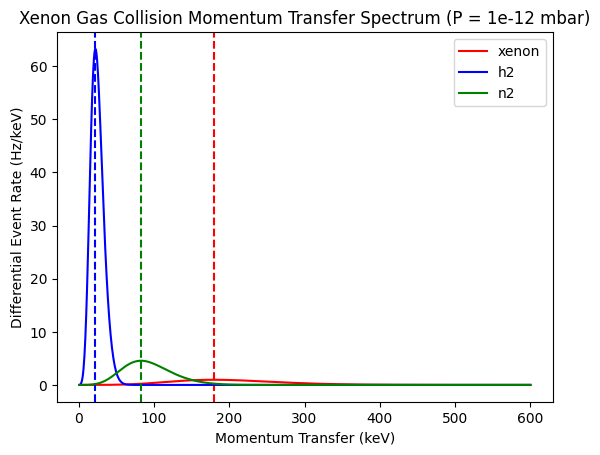

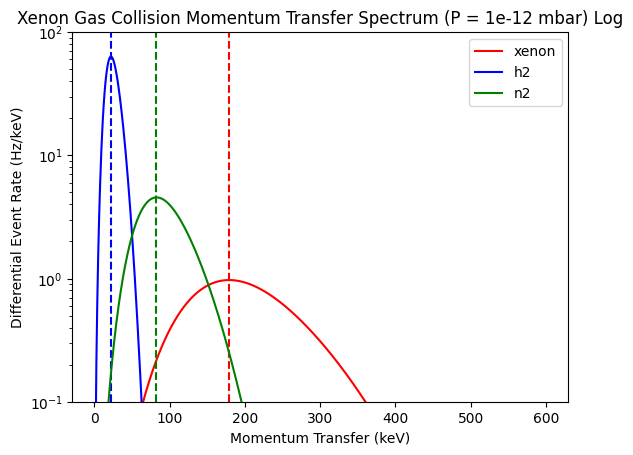

In [7]:
P = 1e-10

xenon = momentum_spectrum(131.3, P)
krypton = momentum_spectrum(83.8, P)
radon = momentum_spectrum(222.017, P)
sf6 = momentum_spectrum(146.05, P)
h2 = momentum_spectrum(2.016, P)
n2 = momentum_spectrum(28.014, P)

colors = ['red', 'blue', 'green', 'orange', 'pink', 'magenta']
gases = ['xenon', 'h2', 'n2']

for i, gas in enumerate([xenon, h2, n2]):
    p, rate, max_p = gas
    plt.plot(p, rate, color=colors[i], label=gases[i])
    plt.axvline(x=max_p, color=colors[i], linestyle='--')
    plt.xlabel("Momentum Transfer (keV)")
    plt.ylabel("Differential Event Rate (Hz/keV)")
    plt.title("Xenon Gas Collision Momentum Transfer Spectrum (P = 1e-12 mbar)")
    plt.legend()
    print("Xenon Peak Event Rate =", round(max_p, 2), "Hz/keV")

plt.show()

for i, gas in enumerate([xenon, h2, n2]):
    p, rate, max_p = gas
    plt.plot(p, rate, color=colors[i], label=gases[i])
    plt.axvline(x=max_p, color=colors[i], linestyle='--')
    plt.xlabel("Momentum Transfer (keV)")
    plt.ylabel("Differential Event Rate (Hz/keV)")
    plt.title("Xenon Gas Collision Momentum Transfer Spectrum (P = 1e-12 mbar) Log")
    plt.legend()

plt.yscale('log')
plt.ylim(10e-2, 10e1)
plt.show()

## High Energy Tail Analysis

xenon :
10% Momentum Threshold = 296.03 Hz/keV
1% Momentum Threshold = 393.49 Hz/keV
Number of events above 10% Threshold (sum of event rates in this region) = 15.72603038376493
Number of events above 1% Threshold (sum of event rates in this region) = 1.5780978212153218


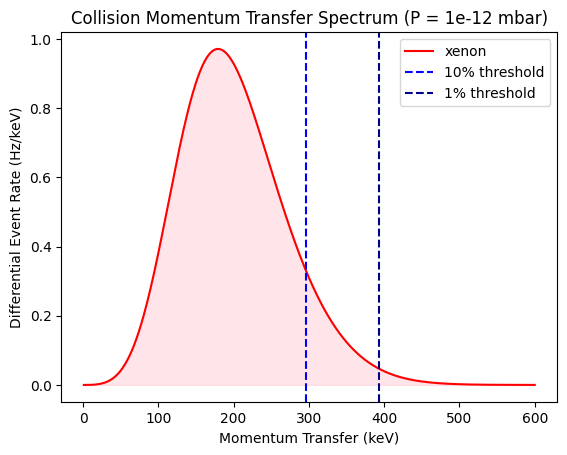

krypton :
10% Momentum Threshold = 236.44 Hz/keV
1% Momentum Threshold = 314.31 Hz/keV
Number of events above 10% Threshold (sum of event rates in this region) = 15.72603038376493
Number of events above 1% Threshold (sum of event rates in this region) = 1.5780978212153218


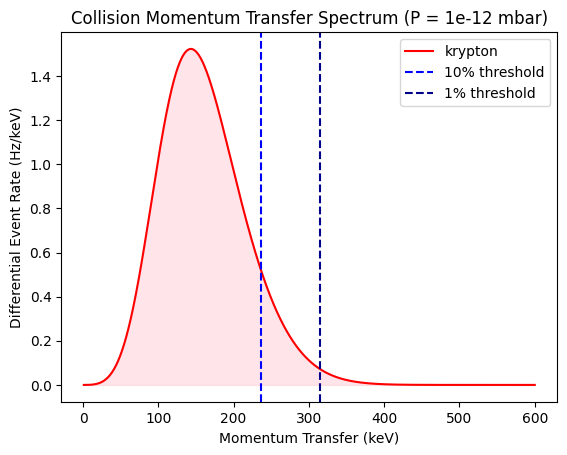

radon :
10% Momentum Threshold = 384.29 Hz/keV
1% Momentum Threshold = 506.24 Hz/keV
Number of events above 10% Threshold (sum of event rates in this region) = 15.72603038376493
Number of events above 1% Threshold (sum of event rates in this region) = 1.5780978212153218


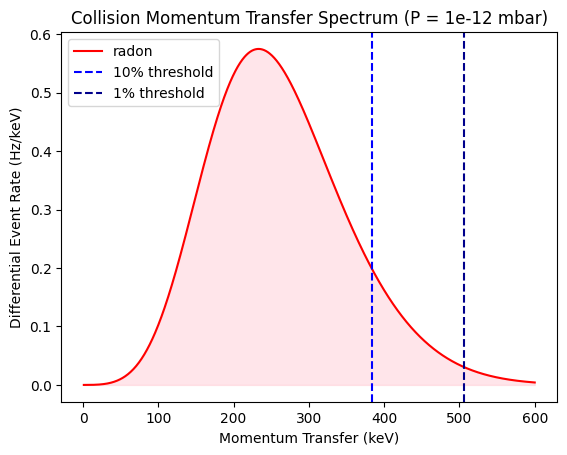

sf6 :
10% Momentum Threshold = 312.22 Hz/keV
1% Momentum Threshold = 414.97 Hz/keV
Number of events above 10% Threshold (sum of event rates in this region) = 15.72603038376493
Number of events above 1% Threshold (sum of event rates in this region) = 1.5780978212153218


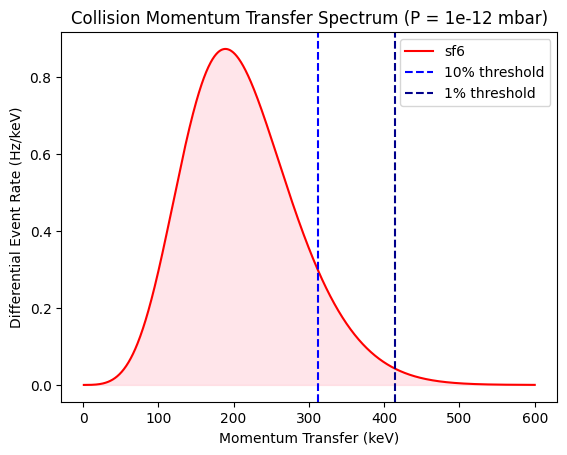

In [29]:
# Xenon

xenon = momentum_spectrum(131.3, P)

P = 1e-10

colors = ['red', 'blue', 'green', 'orange', 'pink', 'magenta']
gases = ['xenon', 'krypton', 'radon', 'sf6']

for i, gas in enumerate([xenon, krypton, radon, sf6]):
    p, rate, max_p = gas

    cumulative_distribution = np.cumsum(rate)
    momentum_10 = np.interp(0.9, cumulative_distribution / cumulative_distribution[-1], p)
    momentum_1 = np.interp(0.99, cumulative_distribution / cumulative_distribution[-1], p)

    plt.plot(p, rate, color='red', label=gases[i])
    plt.fill_between(p, rate, color='pink', alpha=0.4)
    plt.axvline(x=momentum_10, color='blue', linestyle='--', label = '10% threshold')
    plt.axvline(x=momentum_1, color='darkblue', linestyle='--', label = '1% threshold')
    plt.xlabel("Momentum Transfer (keV)")
    plt.ylabel("Differential Event Rate (Hz/keV)")
    plt.title("Collision Momentum Transfer Spectrum (P = 1e-12 mbar)")
    plt.legend()

    print(gases[i], ":")
    print("10% Momentum Threshold =", round(momentum_10, 2), "Hz/keV")
    print("1% Momentum Threshold =", round(momentum_1, 2), "Hz/keV")

    # Integrate the event rates to get the number of events within the 10% region
    above_threshold_indices = np.where(p > momentum_10)[0]
    above_threshold_p = p[above_threshold_indices]
    above_threshold_rate = rate[above_threshold_indices]
    events_10_percent = np.trapz(above_threshold_rate, above_threshold_p)

    # Integrate the event rates to get the number of events within the 1% region
    above_threshold_indices = np.where(p > momentum_1)[0]
    above_threshold_p = p[above_threshold_indices]
    above_threshold_rate = rate[above_threshold_indices]
    events_1_percent = np.trapz(above_threshold_rate, above_threshold_p)


    print("Number of events above 10% Threshold (sum of event rates in this region) =", number_of_events_in_10_percent)
    print("Number of events above 1% Threshold (sum of event rates in this region) =", number_of_events_in_1_percent)
    plt.show()

1% and 10%  tail for different species

10-12 mbar partial pressure is a good scale

If we are in this tail, we can do the measurement

100 ms feedback to separate collision



Hard collision

90% is noise (unresolved)


10-6 to leak valve to chamber to pump (measure pressure ahead of leak) (measure pressure in chamber)


Use big N in ideal gas law
Put in H2 and N2 to make sure that the tails are lower and peaks higher and more to the left of radon atoms out of source
Is there hope of getting enough radon?


Download Autodesk Fusion (ask to be added to repo)


Levitated : space force usf

Counts per second

Vacuum:


Partial pressure of xenon: tiny

Low pressure to leak valve (conductance / impedance)

RGA residual : xenon partial pressure compared to everything else

Conflate